In [1]:
#basic library imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#to store in notebook
%matplotlib inline

**DATA PREP AND CLEANING**

In [7]:
# Covid_data_from -> https://ourworldindata.org/coronavirus-source-data
#loading  covid_data_csv -> covid_data_frame
covid_data_df = pd.read_csv('./owid-covid-data.csv')
covid_data_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112014,ZWE,Africa,Zimbabwe,2021-08-21,122487.0,585.0,376.286,4236.0,38.0,20.857,8241.109,39.360,25.317,285.004,2.557,1.403,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3753242.0,2301341.0,1451901.0,NaN,53734.0,74048.0,25.25,15.48,9.77,NaN,4982.0,73.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
112015,ZWE,Africa,Zimbabwe,2021-08-22,122652.0,165.0,366.286,4249.0,13.0,20.000,8252.210,11.101,24.644,285.879,0.875,1.346,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773199.0,2312117.0,1461082.0,NaN,19957.0,69134.0,25.39,15.56,9.83,NaN,4651.0,73.15,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
112016,ZWE,Africa,Zimbabwe,2021-08-23,123001.0,349.0,416.143,4293.0,44.0,26.286,8275.692,23.481,27.999,288.839,2.960,1.769,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3829011.0,2345043.0,1483968.0,NaN,55812.0,69004.0,25.76,15

In [8]:
#dataset from -> https://www.kaggle.com/fernandol/countries-of-the-world
#Loading countries_of_the_world_csv -> countries_data_frame
countries_data_df = pd.read_csv('./countries of the world.csv')
countries_data_df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


*This is followed by cleaning the datasets. This process involves handling missing and invalid data, grouping by columns, selecting necessary columns, and finally combining datasets to get a finalized df*

In [9]:
#renaming the column 'location' to 'Country'
covid_data_df = covid_data_df.rename(columns = {'location' :'Country'}, inplace = False)
#creating a dataframe with only the columns I require
new_covid_data_df = covid_data_df[['Country','date','continent', 'population', 'gdp_per_capita', 'life_expectancy', 'male_smokers', 'female_smokers' ]]

In [10]:
#Grouping all values by the 'Country' column, choosing the first value from its multiple rows and then reseting the index
new_covid_data_df= new_covid_data_df.groupby('Country').first().reset_index()

In [12]:
#Removing the rows that have NA/None in 'continent' column
new_covid_data_df=new_covid_data_df[new_covid_data_df['continent'].notna()].reset_index()

In [13]:
#dropping the index column
new_covid_data_df= new_covid_data_df.drop('index', axis=1)

#dropping the date column
new_covid_data_df= new_covid_data_df.drop('date', axis=1)

In [14]:
#stripping spaces at the beginning and at the end using strip()
new_covid_data_df['Country'] = new_covid_data_df['Country'].str.strip()



> first df



In [15]:
new_covid_data_df

,level_0,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers
0,0,Afghanistan,Asia,38928341.0,1803.987,64.83,NaN,NaN
1,1,Albania,Europe,2877800.0,11803.431,78.57,51.2,7.1
2,2,Algeria,Africa,43851043.0,13913.839,76.88,30.4,0.7
3,3,Andorra,Europe,77265.0,NaN,83.73,37.8,29.0
4,4,Angola,Africa,32866268.0,5819.495,61.15,NaN,NaN
...,...,...,...,...,...,...,...,...
219,219,Vietnam,Asia,97338583.0,6171.884,75.40,45.9,1.0
220,220,Wallis and Futuna,Oceania,11246.0,NaN,79.94,NaN,NaN
221,221,Yemen,Asia,29825968.0,1479.147,66.12,29.2,7.6
222,222,Zambia,Africa,18383956.0,3689.251,63.89,24.7,3.1




> second df



In [16]:
#creating a dataframe with only the required columns
new_countries_data_df = countries_data_df[['Country', 'Region', 'Net migration', 'Literacy (%)']]

In [17]:
#stripping spaces at the beginning and at the end using strip()
new_countries_data_df['Country'] = new_countries_data_df['Country'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
new_countries_data_df

,Country,Region,Net migration,Literacy (%)
0,Afghanistan,ASIA (EX. NEAR EAST),"23,06","36,0"
1,Albania,EASTERN EUROPE,"-4,93","86,5"
2,Algeria,NORTHERN AFRICA,"-0,39","70,0"
3,American Samoa,OCEANIA,"-20,71","97,0"
4,Andorra,WESTERN EUROPE,"6,6","100,0"
...,...,...,...,...
222,West Bank,NEAR EAST,"2,98",NaN
223,Western Sahara,NORTHERN AFRICA,NaN,NaN
224,Yemen,NEAR EAST,0,"50,2"
225,Zambia,SUB-SAHARAN AFRICA,0,"80,6"


*Second df doesnt need cleaning 
as for the first df it contains information about countries from 22 Feb 2020 -- 25 Aug 2021(which i upgraded data set latest)(it depends on when you download the csv from website)* 

In [23]:
# covid_data_df.tail(1)['date'] gives the latest date
# now we are doing the cummulative for all countries
total_covid_data_df = covid_data_df.groupby('Country').last() 

**DATA CLEANING**

In [24]:
#removing rows that have 0 life expectancy

total_covid_data_df = total_covid_data_df[total_covid_data_df['life_expectancy'] !=0].reset_index() 

In [25]:
#creating a df with only the required columns

new_total_covid_data_df = total_covid_data_df[['Country','hospital_beds_per_thousand','total_cases', 'total_deaths', 'total_tests']]


> Third df



In [26]:
new_total_covid_data_df

,Country,hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,0.500,152722.0,7090.0,NaN
1,Africa,NaN,7622795.0,191782.0,NaN
2,Albania,2.890,141365.0,2483.0,737014.0
3,Algeria,1.900,193171.0,5096.0,NaN
4,Andorra,NaN,15014.0,130.0,207446.0
...,...,...,...,...,...
228,Wallis and Futuna,NaN,NaN,NaN,NaN
229,World,2.705,213866744.0,4463127.0,NaN
230,Yemen,0.700,7625.0,1438.0,NaN
231,Zambia,2.000,205107.0,3586.0,2216799.0


*Combining the dataframes to get final dataframe*

In [27]:
#merging first and second dfs:
first_second = new_covid_data_df.merge(new_countries_data_df, on='Country')

In [28]:
#merging the result with the third dataframe:
my_df = first_second.merge(new_total_covid_data_df, on = 'Country')



> Finale DF


In [29]:
my_df

,level_0,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,0,Afghanistan,Asia,38928341.0,1803.987,64.83,NaN,NaN,ASIA (EX. NEAR EAST),"23,06","36,0",0.50,152722.0,7090.0,NaN
1,1,Albania,Europe,2877800.0,11803.431,78.57,51.2,7.1,EASTERN EUROPE,"-4,93","86,5",2.89,141365.0,2483.0,737014.0
2,2,Algeria,Africa,43851043.0,13913.839,76.88,30.4,0.7,NORTHERN AFRICA,"-0,39","70,0",1.90,193171.0,5096.0,NaN
3,3,Andorra,Europe,77265.0,NaN,83.73,37.8,29.0,WESTERN EUROPE,"6,6","100,0",NaN,15014.0,130.0,207446.0
4,4,Angola,Africa,32866268.0,5819.495,61.15,NaN,NaN,SUB-SAHARAN AFRICA,0,"42,0",NaN,46539.0,1176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,219,Vietnam,Asia,97338583.0,6171.884,75.40,45.9,1.0,ASIA (EX. NEAR EAST),"-0,45","90,3",2.60,381363.0,9349.0,10939961.0
186,220,Wallis and Futuna,Oceania,11246.0,NaN,79.94,NaN,NaN,OCEANIA,NaN,"50,0",NaN,NaN,NaN,NaN
187,221,Yemen,Asia,29825968.0,1479.147,66.12,29.2,7.6,NEAR EAST,0,"50,2",0.70,7625.0,1438.0,NaN
188,222,Zambia,Africa,18383956.0,3689.251,63.89,24.7,3.1,SUB-SAHARAN AFRICA,0,"80,6",2.00,205107.0,3586.0,2216799.0


In [30]:
my_df.shape #gives the shape(rows and columns) of the df

(190, 15)

In [31]:
my_df.info() #gives the summary of my_df(index dtype and column dtypes, non-null values and memory usage)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     190 non-null    int64  
 1   Country                     190 non-null    object 
 2   continent                   190 non-null    object 
 3   population                  190 non-null    float64
 4   gdp_per_capita              171 non-null    float64
 5   life_expectancy             188 non-null    float64
 6   male_smokers                134 non-null    float64
 7   female_smokers              136 non-null    float64
 8   Region                      190 non-null    object 
 9   Net migration               188 non-null    object 
 10  Literacy (%)                180 non-null    object 
 11  hospital_beds_per_thousand  156 non-null    float64
 12  total_cases                 171 non-null    float64
 13  total_deaths                166 non

In [32]:
my_df.describe() #gives the statistical details of the df like percentile, mean, std

,level_0,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,hospital_beds_per_thousand,total_cases,total_deaths,total_tests
count,190.000000,1.900000e+02,171.000000,188.000000,134.000000,136.000000,156.000000,1.710000e+02,166.000000,1.170000e+02
mean,110.900000,3.955905e+07,19321.281292,73.424840,32.304478,10.654412,2.970750,1.230293e+06,26433.572289,2.441433e+07
std,64.580089,1.494291e+08,20209.983139,7.415443,13.229898,10.471703,2.405292,4.261655e+06,81352.442844,7.231852e+07
min,0.000000,4.999000e+03,702.225000,54.240000,7.700000,0.100000,0.100000,2.000000e+00,1.000000,6.028000e+04
25%,57.250000,1.058943e+06,4025.412000,68.325000,21.850000,1.900000,1.300000,1.742700e+04,405.500000,1.536425e+06
50%,109.500000,8.127861e+06,12895.635000,74.575000,31.150000,6.650000,2.310000,1.527220e+05,2845.500000,4.731376e+06
75%,165.750000,2.740473e+07,27012.304500,78.815000,41.025000,19.150000,4.050000,6.638310e+05,12430.000000,1.692670e+07
max,223.000000,1.439324e+09,116935.600000,86.750000,76.100000,43.000000,13.800000,3.822303e+07,632272.000000,5.118228e+08


*From the above analysis we get that standard deviation is 1.494291e+08 and mean is 3.955905e+07. we can say that standard deviation is much higher than mean -> (Hight Unpredictability)*

In [33]:
#Calculating average life expectancy using weighted average formula:
prod_le_df = my_df['population']*my_df['life_expectancy']
avg_le = prod_le_df.sum()/my_df['population'].sum()
print("\n The average life expectancy of the countries is {:.2f} ".format(avg_le))


 The average life expectancy of the countries is 72.88 


In [34]:
print("The sum total of all the reported cases upto August 25th, 2021 is {}, out of which {} people have died. The total tests conducted is {}".format(my_df['total_cases'].sum(), my_df['total_deaths'].sum(), my_df['total_tests'].sum()))

The sum total of all the reported cases upto August 25th, 2021 is 210380062.0, out of which 4387973.0 people have died. The total tests conducted is 2856476703.0


In [35]:
#locating the country with the highest deaths and cases:
chc = my_df.loc[my_df['total_cases']==my_df['total_cases'].max(), 'Country'].item()
chd = my_df.loc[my_df['total_deaths']==my_df['total_deaths'].max(), 'Country'].item()
print("The country with the highest number of cases is {} with {} cases, and that with the highest number of deaths is {} with {} deaths".format(chc, my_df['total_cases'].max(), chd, my_df['total_deaths'].max()))

The country with the highest number of cases is United States with 38223029.0 cases, and that with the highest number of deaths is United States with 632272.0 deaths


Country_highest

1.   cases -> USA
2.   death -> USA



Plotting different graphs 

In [36]:
#configuring styles:
sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize'] = (11,7)
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.facecolor'] = '#0f0f0f80'

In [37]:
my_df_cont = my_df.groupby('continent')[['total_cases', 'total_deaths', 'total_tests', 'population']].sum().reset_index()

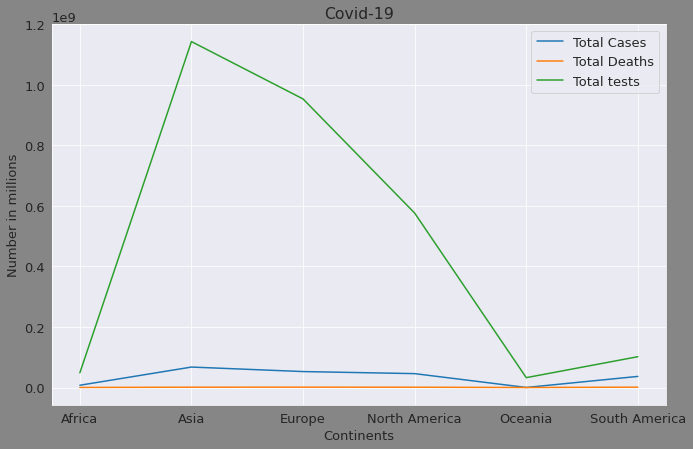

In [38]:
#plotting a line chart to compare total tests, deaths and cases across the continents
plt.plot(my_df_cont['continent'], my_df_cont['total_cases'])
plt.plot(my_df_cont['continent'], my_df_cont['total_deaths'])
plt.plot(my_df_cont['continent'], my_df_cont['total_tests'])
#x,y labels
plt.xlabel('Continents')
plt.ylabel('Number in millions')
#title
plt.title('Covid-19')
#legend
plt.legend(['Total Cases', 'Total Deaths', 'Total tests'])



> From the graph, we can note that the most number of tests have been done in Asia, and the least in Oceania. Similarly, the highest number of cases are again from Asia, and the lowest from Oceania.
But it seems we cannot determine the same for total deaths as the line is somewhat straight. So, lets try to use a barplot to show the total deaths across the continents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


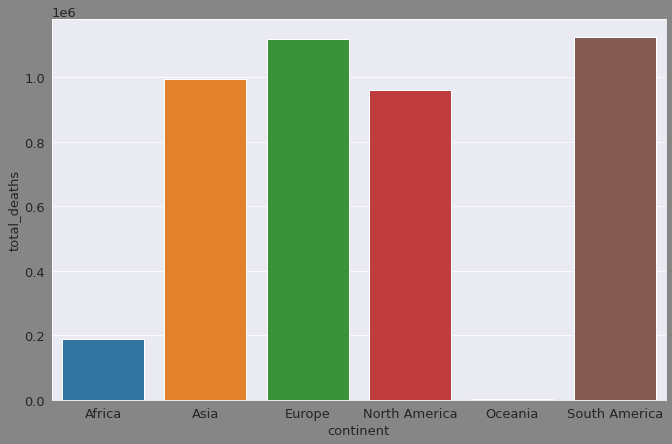

In [39]:
sns.barplot('continent', 'total_deaths', data= my_df_cont)


> From the barplot, it is clear that the total deaths is the highest in Europe, and the lowest in Oceania. Hence, Oceania seems to be the least affected continent from all aspects.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


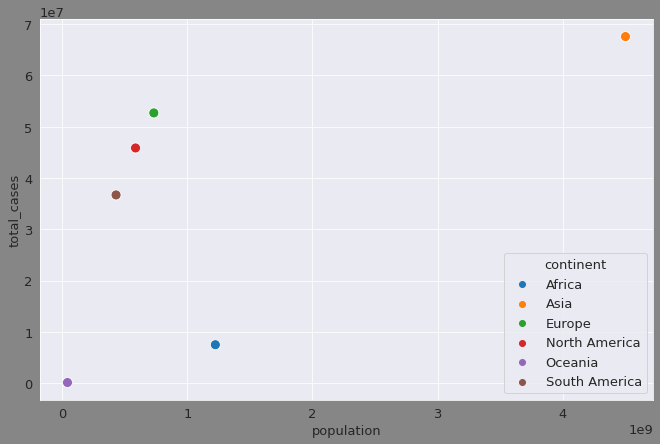

In [40]:
#scatterplot for total cases and total population
sns.scatterplot(my_df_cont.population, # X-axis
                my_df_cont.total_cases,  # Y-axis
                hue=my_df_cont.continent,  # Dot color
                s=100);

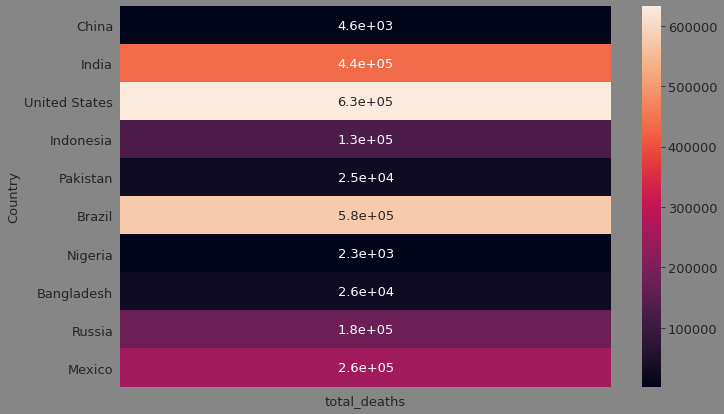

In [41]:
#grouping by country, sorting the column by population in descending order and creaitng df of top 10 countries
my_df_2 = my_df.groupby('Country').first().sort_values('population', ascending=False).head(10)

#using only the total deaths column
my_df_2 = my_df_2[['total_deaths']]

#plotting it in a heatmap
sns.heatmap(my_df_2, annot=True)



> So, among the top 10 countries with the highest population, China has the least number of deaths, and USA has the highest.



**Multiple Plotting**

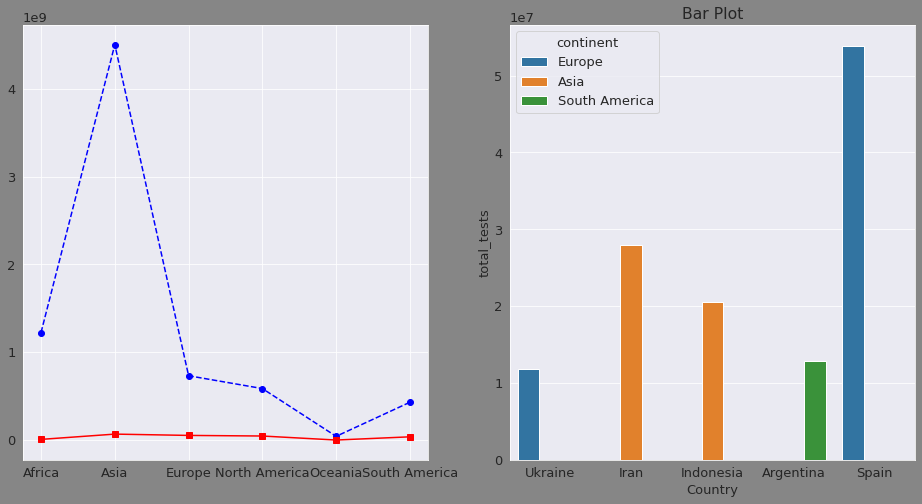

In [42]:
fig, axes = plt.subplots(1,2, figsize= (16,8))

#For axes(0)
axes[0].plot(my_df_cont['continent'], my_df_cont['population'], 'o--b')
axes[0].plot(my_df_cont['continent'], my_df_cont['total_cases'], 's-r')

plt.xlabel('Continents')
plt.ylabel('Number in millions')
plt.title('Population vs Total Cases')
plt.legend(['Population', 'Total Cases'])

#For axes(1)
#10 random countries from 25 countries with the highest death rate
my_df_3 = my_df.sort_values('total_deaths', ascending = False).head(25).sample(10) 
axes[1].set_title('Bar Plot')
sns.barplot(x='Country', y='total_tests', hue='continent', data= my_df_3.sample(5), ax=axes[1])

least_hospital_beds_per_thousand?

1.   countries that have the least hospital_beds_per_thousand also fall in the group of countries with highest cases per thousand (Top 50)
2.   countries that have the least hospital_beds_per_thousand also fall in the group of countries with highest deaths per thousand (Top 50)
3.   countries that have the least hospital_beds_per_thousand also fall in the group of countries with lowest tests per thousand (Top 50)






In [43]:
#adding three new columns to our df: tests_per_thousand, deaths_per_thousand and cases_per_thousand
my_df['cases_per_thousand'] = my_df['total_cases']*1e3 / my_df['population']
my_df['tests_per_thousand'] = my_df['total_tests']*1e3 / my_df['population']
my_df['deaths_per_thousand'] = my_df['total_deaths']*1e3 / my_df['population']#x1000 (1e3) as dataset has perthousand data

In [44]:
#separate dataframes for: 50 countries with lowest hospital beds per thousand, 50 countries with highest cases per thousand, 50 countries with highest deaths per thousand, and 50 countries with lowest tests per thousand

#50 countries with lowest hosp beds per thousand
my_df_hosp = my_df.sort_values(by = 'hospital_beds_per_thousand', ascending =True).head(50)

#50 countries with highest_cases per thousand

my_df_hc = my_df.sort_values(by = 'cases_per_thousand', ascending=False).head(50)

#50 countries with highest_deaths per thousand

my_df_hd = my_df.sort_values(by = 'deaths_per_thousand', ascending=False).head(50)

#50 countries with least tests per thousand

my_df_lt = my_df.sort_values(by = 'tests_per_thousand', ascending=False).head(50)

In [45]:
#low hospital bed and highest cases
hosp_hc_count = my_df_hosp['Country'].isin(my_df_hc['Country']).value_counts()[True]
#similarly highest deaths
hosp_hd_count = my_df_hosp['Country'].isin(my_df_hd['Country']).value_counts()[True]
#similarly lowest test
hosp_lt_count = my_df_hosp['Country'].isin(my_df_lt['Country']).value_counts()[True]

print('There are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the highest cases.'.format(hosp_hc_count))
print('\n Similarly, there are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the highest deaths.'.format(hosp_hd_count))
print('\n And finally, there are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the lowest tests.'.format(hosp_lt_count))


There are 4 countries that have the least hospital beds per thousand and also fall under the group of countries with the highest cases.

 Similarly, there are 5 countries that have the least hospital beds per thousand and also fall under the group of countries with the highest deaths.

 And finally, there are 3 countries that have the least hospital beds per thousand and also fall under the group of countries with the lowest tests.


In [46]:
#Countries that have highest number of smokers and cases
my_df['Total_smokers'] = my_df['male_smokers'] + my_df['female_smokers']

my_df_smk = my_df.sort_values(by = 'Total_smokers', ascending =False).head(50)

#highest smokers and highest cases
smk_hc_count = my_df_smk['Country'].isin(my_df_hc['Country']).value_counts()[True]

print('There are {} countries that have the most number of smokers and also fall under the countries with the highest number of cases.'.format(smk_hc_count))

There are 26 countries that have the most number of smokers and also fall under the countries with the highest number of cases.


In [47]:
#countries that fall under the group of the highest number of smokers and also have the highest number of deaths
# highest smokers and highest deaths
smk_hd_count = my_df_smk['Country'].isin(my_df_hd['Country']).value_counts()[True]

print('There are {} countries that have the most number of smokers and also fall under the countries with the highest number of deaths.'.format(smk_hd_count))

There are 27 countries that have the most number of smokers and also fall under the countries with the highest number of deaths.


In [48]:
#creating dataframe with 10 countries with most cases
mostcases_df = my_df.sort_values(by='total_cases', ascending= False).head(10)
mostcases_df

,level_0,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests,cases_per_thousand,tests_per_thousand,deaths_per_thousand,Total_smokers
180,213,United States,North America,3.310026e+08,54225.446,78.86,24.6,19.1,NORTHERN AMERICA,"3,41","97,0",2.77,38223029.0,632272.0,511822768.0,115.476506,1546.279985,1.910172,43.7
77,91,India,Asia,1.380004e+09,6426.674,69.66,20.6,1.9,ASIA (EX. NEAR EAST),"-0,07","59,5",0.53,32512366.0,435758.0,506256239.0,23.559611,366.851181,0.315766,22.5
23,27,Brazil,South America,2.125594e+08,14103.452,75.88,17.9,10.1,LATIN AMER. & CARIB,"-0,03","86,4",2.20,20645537.0,576645.0,31716527.0,97.128314,149.212529,2.712865,28.0
57,70,France,Europe,6.756425e+07,38605.671,82.66,35.6,30.1,WESTERN EUROPE,"0,66","99,0",5.98,6757783.0,114144.0,NaN,100.020098,NaN,1.689414,65.7
141,165,Russia,Europe,1.459345e+08,24765.954,72.58,58.3,23.4,C.W. OF IND. STATES,"1,02","99,6",8.05,6709605.0,175328.0,175504485.0,45.976838,1202.625377,1.201416,81.7
179,212,United Kingdom,Europe,6.788600e+07,39753.244,81.32,24.7,20.0,WESTERN EUROPE,"2,19","99,0",2.54,6621799.0,132323.0,234648590.0,97.542919,3456.509091,1.949194,44.7
173,205,Turkey,Asia,8.433907e+07,25129.341,77.69,41.1,14.1,NEAR EAST,0,"86,5",2.81,6273651.0,55212.0,74057684.0,74.386061,878.094656,0.654643,55.2
6,7,Argentina,South America,4.519578e+07,18933.907,76.67,27.7,16.2,LATIN AMER. & CARIB,"0,61","97,1",5.00,5155079.0,110966.0,12883511.0,114.061077,285.060062,2.455229,43.9
36,42,Colombia,South America,5.088288e+07,13254.949,77.29,13.5,4.7,LATIN AMER. & CARIB,"-0,31","92,5",1.71,4897150.0,124474.0,23700152.0,96.243562,465.778473,2.446284,18.2
159,188,Spain,Europe,4.675478e+07,34272.360,83.56,31.4,27.4,WESTERN EUROPE,"0,99","97,9",2.97,4815205.0,83690.0,53892999.0,102.988501,1152.673492,1.789977,58.8


In [49]:
#creating a dataframe with most number of deaths Top 10
mostdeaths_df=my_df.sort_values(by='total_deaths', ascending= False).head(10)
mostdeaths_df

,level_0,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests,cases_per_thousand,tests_per_thousand,deaths_per_thousand,Total_smokers
180,213,United States,North America,3.310026e+08,54225.446,78.86,24.6,19.1,NORTHERN AMERICA,"3,41","97,0",2.77,38223029.0,632272.0,511822768.0,115.476506,1546.279985,1.910172,43.7
23,27,Brazil,South America,2.125594e+08,14103.452,75.88,17.9,10.1,LATIN AMER. & CARIB,"-0,03","86,4",2.20,20645537.0,576645.0,31716527.0,97.128314,149.212529,2.712865,28.0
77,91,India,Asia,1.380004e+09,6426.674,69.66,20.6,1.9,ASIA (EX. NEAR EAST),"-0,07","59,5",0.53,32512366.0,435758.0,506256239.0,23.559611,366.851181,0.315766,22.5
112,128,Mexico,North America,1.289328e+08,17336.469,75.05,21.4,6.9,LATIN AMER. & CARIB,"-4,87","92,2",1.38,3271128.0,255452.0,8933286.0,25.370807,69.286398,1.981281,28.3
135,158,Peru,South America,3.297185e+07,12236.706,76.74,NaN,4.8,LATIN AMER. & CARIB,"-1,05","90,9",1.60,2143691.0,197944.0,5037992.0,65.015802,152.796783,6.003425,NaN
141,165,Russia,Europe,1.459345e+08,24765.954,72.58,58.3,23.4,C.W. OF IND. STATES,"1,02","99,6",8.05,6709605.0,175328.0,175504485.0,45.976838,1202.625377,1.201416,81.7
179,212,United Kingdom,Europe,6.788600e+07,39753.244,81.32,24.7,20.0,WESTERN EUROPE,"2,19","99,0",2.54,6621799.0,132323.0,234648590.0,97.542919,3456.509091,1.949194,44.7
78,92,Indonesia,Asia,2.735236e+08,11188.744,71.72,76.1,2.8,ASIA (EX. NEAR EAST),0,"87,9",1.04,4026837.0,129293.0,20501173.0,14.722081,74.952112,0.472694,78.9
84,98,Italy,Europe,6.046183e+07,35220.084,83.51,27.8,19.8,WESTERN EUROPE,"2,07","98,6",3.18,4502396.0,128914.0,82003364.0,74.466753,1356.283240,2.132155,47.6
36,42,Colombia,South America,5.088288e+07,13254.949,77.29,13.5,4.7,LATIN AMER. & CARIB,"-0,31","92,5",1.71,4897150.0,124474.0,23700152.0,96.243562,465.778473,2.446284,18.2




> Multiplot for these 2 datasets



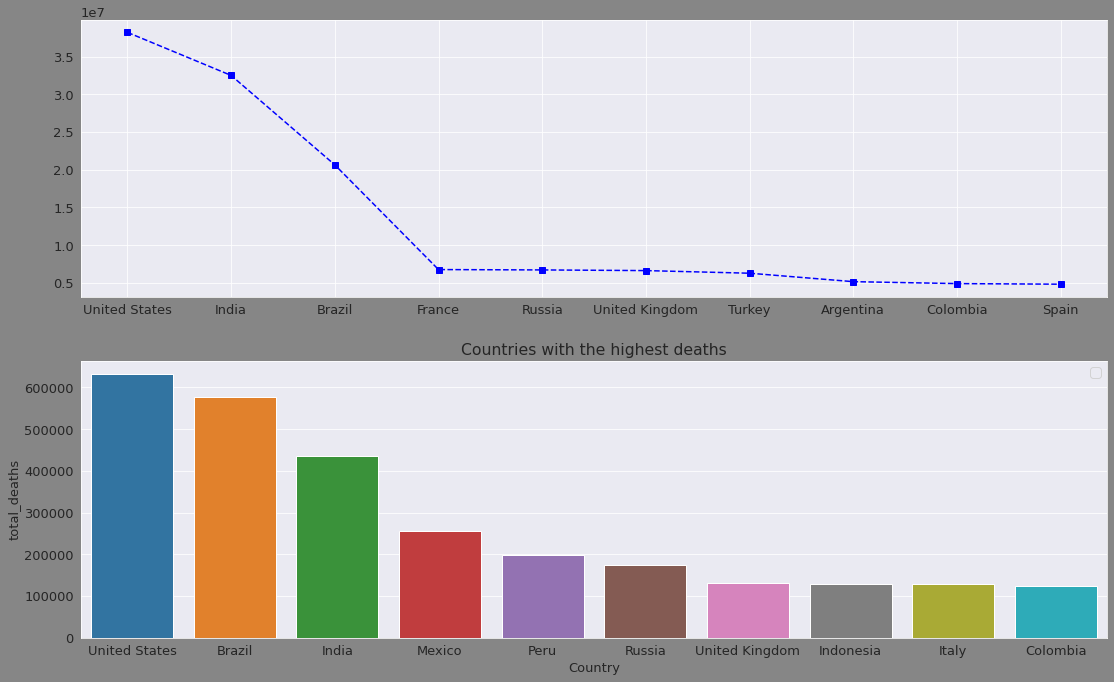

In [50]:
#multiplot
fig, axes = plt.subplots(2,1, figsize= (16,10))
axes[0].plot(mostcases_df['Country'], mostcases_df['total_cases'], 's--b')
#x,y labels
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Countries with the highest cases')
plt.legend(['Country', 'Total Cases'])
#titles
axes[1].set_title('Countries with the highest deaths')
sns.barplot(x='Country', y='total_deaths', data= mostdeaths_df, ax=axes[1])
#layout
plt.tight_layout(pad=2)